<a href="https://colab.research.google.com/github/Danika-Balas/msds-458/blob/master/458_Assignment1_Expt3_h1-range100-900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup and Preprocessing

In [22]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.3.0-tf'

In [23]:
tf.__version__

'2.2.0-rc3'

In [0]:
from keras import metrics

In [0]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [0]:
# Set see in order to achieve consistent results across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

####Import MNIST dataset

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [29]:
#Store copy of training images in order to easily view images even after transformation are performed
example_train_images = train_images.copy()
example_train_images.shape

(60000, 28, 28)

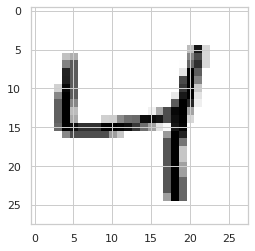

In [30]:
# Example of a single sample, a 28x28 pixel image of a handwritten digit
digit = example_train_images[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

####Prepare the data

In [0]:
# Reshape the data into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# Scale the data to [0,1] interval
train_images = train_images.astype('float32') / 255

# Do the same for the test dataset
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# Split training data into training set and validation set
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

#Experiment 3

We will fine-tune the hyperparameters of the model until we find the 'best' model according to our selected metrics

In [0]:
# Function builds models with 1 hidden layer (by default), then the same number of nodes in each hidden layer
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(n_hidden=1, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    #model.add(keras.layers.Dense(85, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
# This function builds models with varying number of nodes in each hidden layer
def build_model2(n_neurons=(2,3), learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(len(n_neurons)):
        model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [36]:
param_grid = {'n_neurons': range(100,900,100)}
param_grid

{'n_neurons': range(100, 900, 100)}

Use grid search to train models with different combinations of parameter values

In [37]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(train_images, train_labels, epochs=30,
                  validation_data=(val_images, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neurons=100 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 36666 samples, validate on 5000 samples
Epoch 1/30
36666/36666 [==============================] - 4s 114us/sample - loss: 0.3993 - accuracy: 0.8842 - val_loss: 0.1890 - val_accuracy: 0.9458
Epoch 2/30
36666/36666 [==============================] - 4s 106us/sample - loss: 0.2022 - accuracy: 0.9396 - val_loss: 0.1442 - val_accuracy: 0.9592
Epoch 3/30
36666/36666 [==============================] - 4s 117us/sample - loss: 0.1558 - accuracy: 0.9535 - val_loss: 0.1202 - val_accuracy: 0.9670
Epoch 4/30
36666/36666 [==============================] - 4s 109us/sample - loss: 0.1307 - accuracy: 0.9606 - val_loss: 0.1077 - val_accuracy: 0.9676
Epoch 5/30
36666/36666 [==============================] - 4s 108us/sample - loss: 0.1096 - accuracy: 0.9665 - val_loss: 0.1017 - val_accuracy: 0.9720
Epoch 6/30
36666/36666 [==============================] - 4s 112us/sample - loss: 0.0983 - accuracy: 0.9697 - val_loss: 0.0946 - val_accuracy: 0.9716
Epoch 7/30
36666/36666 [===========================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.1s remaining:    0.0s


Train on 36667 samples, validate on 5000 samples
Epoch 1/30
36667/36667 [==============================] - 4s 110us/sample - loss: 0.3944 - accuracy: 0.8862 - val_loss: 0.1930 - val_accuracy: 0.9468
Epoch 2/30
36667/36667 [==============================] - 4s 110us/sample - loss: 0.2031 - accuracy: 0.9396 - val_loss: 0.1402 - val_accuracy: 0.9632
Epoch 3/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.1582 - accuracy: 0.9529 - val_loss: 0.1221 - val_accuracy: 0.9646
Epoch 4/30
36667/36667 [==============================] - 4s 106us/sample - loss: 0.1320 - accuracy: 0.9597 - val_loss: 0.1094 - val_accuracy: 0.9708
Epoch 5/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.1149 - accuracy: 0.9650 - val_loss: 0.0969 - val_accuracy: 0.9714
Epoch 6/30
36667/36667 [==============================] - 4s 112us/sample - loss: 0.0961 - accuracy: 0.9699 - val_loss: 0.0948 - val_accuracy: 0.9730
Epoch 7/30
36667/36667 [===========================

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 16.2min finished


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.2254 - accuracy: 0.9327 - val_loss: 0.1093 - val_accuracy: 0.9690
Epoch 2/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.0768 - val_accuracy: 0.9780
Epoch 3/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.0753 - val_accuracy: 0.9758
Epoch 4/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.0571 - accuracy: 0.9815 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 5/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.0466 - accuracy: 0.9846 - val_loss: 0.0693 - val_accuracy: 0.9802
Epoch 6/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.0698 - val_accuracy: 0.9790


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb924bfde80>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': range(100, 900, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

##EVALUATE

### Inspecting the best estimator

Let's get the number of neurons that produced the best estimator

In [38]:
grid_cv.best_params_

{'n_neurons': 700}

Let's get the rsults to compare the performance of the 100 models.

In [39]:
results = grid_cv.cv_results_
results

{'mean_fit_time': array([52.08086824, 46.35500479, 37.63238454, 37.59225392, 37.11452889,
        37.71199703, 38.57522527, 28.64885815]),
 'mean_score_time': array([0.95465072, 0.95755394, 1.01604072, 1.04775167, 1.10232067,
        1.08103267, 1.14302699, 1.14870381]),
 'mean_test_score': array([0.97289089, 0.97452724, 0.97470907, 0.97492721, 0.97478183,
        0.97303635, 0.97607271, 0.97303633]),
 'param_n_neurons': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neurons': 100},
  {'n_neurons': 200},
  {'n_neurons': 300},
  {'n_neurons': 400},
  {'n_neurons': 500},
  {'n_neurons': 600},
  {'n_neurons': 700},
  {'n_neurons': 800}],
 'rank_test_score': array([8, 5, 4, 2, 3, 6, 1, 7], dtype=int32),
 'split0_test_score': array([0.97387367, 0.9762736 , 0.97561908, 0.97725534, 0.97316462,
        0.97343731, 0.97654629, 0.97452819])

In [40]:
results['params'], results['rank_test_score']

([{'n_neurons': 100},
  {'n_neurons': 200},
  {'n_neurons': 300},
  {'n_neurons': 400},
  {'n_neurons': 500},
  {'n_neurons': 600},
  {'n_neurons': 700},
  {'n_neurons': 800}],
 array([8, 5, 4, 2, 3, 6, 1, 7], dtype=int32))

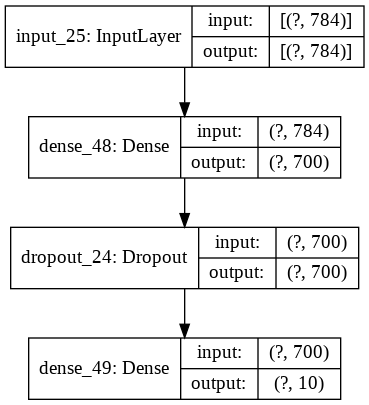

In [41]:
best_model = grid_cv.best_estimator_.model
keras.utils.plot_model(best_model, show_shapes=True)

In [42]:
best_model.evaluate(test_images, test_labels)

[0.06559605062855699, 0.9803]